#// pip install --user jupyter
#// pip install jupyter

# Importaciones 
Empezamos importando todas las librerias y cargando los datos!

In [12]:
#Importamos todos los paquetes que vamos a necesitar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [13]:
# cargamos nuestro dataset
wine = pd.read_csv('./databases/vinos_tintos.csv')

# Analisis univariadas y limpieza de datos

In [15]:
# miramos el dataset y como aparece!
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,country,pricing
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,49.0,Spain,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,0.098,52.0,Italy,Expensive
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,0.098,52.0,Italy,Expensive
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,0.098,72.0,Italy,Budget
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,56.0,Italy,Budget


In [6]:
# miramos ahora las tipologia de variables que tenemos
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1594 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1594 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1594 non-null   float64
 11  success               1599 non-null   float64
 12  country               1599 non-null   object 
 13  pricing               1599 non-null   object 
dtypes: float64(12), object(2)
memory usage: 162.5+ KB


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success
count,1594.000000,1599.000000,1599.000000,1594.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1594.000000,1599.000000
mean,8.321455,0.527821,0.270976,2.521982,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,0.104240,57.774234
std,1.741475,0.179060,0.194801,1.438068,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,0.010659,14.174611
min,4.600000,0.120000,0.000000,-4.021123,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,0.084000,-0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,0.095000,48.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,0.102000,57.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,0.111000,67.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,0.149000,96.000000


<AxesSubplot:xlabel='country', ylabel='count'>

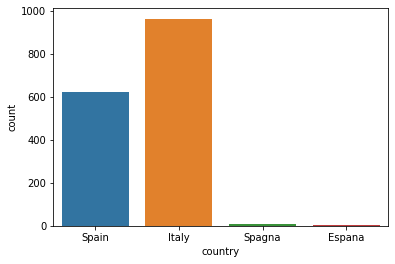

In [10]:
# empezamos con un grafico de barras de la proveniencia geografica
sns.countplot(x='country', data=wine)

In [14]:
# Creamos una serie, de filtros bolleanos
# .str.contains('spa', case = False)
# verifica si contiene el string por parametro, en caso encontrarse sera False
spain_data = wine['country'].str.contains('spa', case=False)
spain_data

0        True
1       False
2       False
3       False
4       False
        ...  
1594     True
1595    False
1596    False
1597    False
1598     True
Name: country, Length: 1599, dtype: bool

In [16]:
# Usando la serie anteriormente creada de filtros booleanos
# np.where(spain_data, 'Spain', wine['country'])
# np.where(serie_filtro, valor reemplazo, columna que recibira el cambio)
wine['country'] = np.where(spain_data, 'Spain', wine['country'])

country
Italy    59127.0
Spain    33254.0
Name: success, dtype: float64


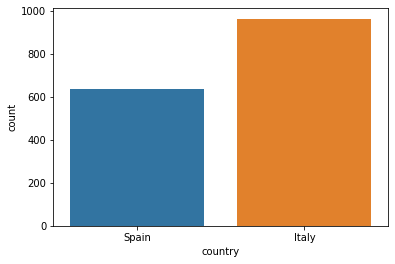

In [17]:
#despues de esta correcion, podemos mirar otra vez nuestro grafico de barras
sns.countplot(x='country', data=wine)
print(wine.groupby('country')['success'].sum())

<AxesSubplot:xlabel='pricing', ylabel='count'>

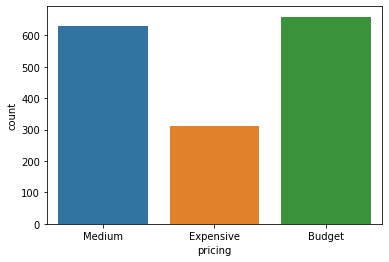

In [21]:
# seguimos ahora con un grafico de barras de los rango de precios
sns.countplot(x='pricing', data=wine)

<AxesSubplot:ylabel='success'>

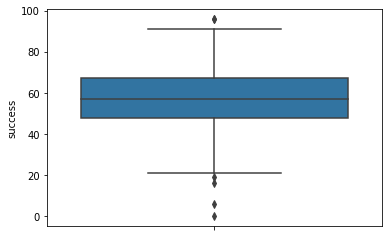

In [22]:
# ahora hacemos un boxplot de la variable success
sns.boxplot(y='success', data=wine)

c:\xampp\htdocs\big data\big data aplicada a los negocios\big_data\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success', ylabel='Density'>

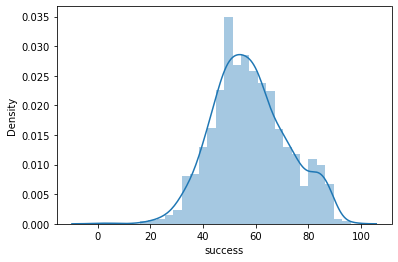

In [23]:
#seguimos con un histograma
sns.distplot(wine['success'])

c:\xampp\htdocs\big data\big data aplicada a los negocios\big_data\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success'>

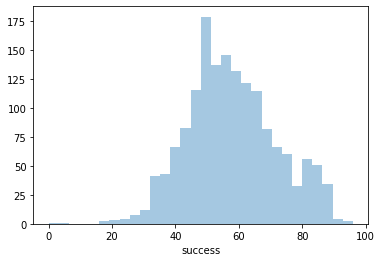

In [24]:
# y si quieremos ver frequencias en lugar de probabilidades
sns.distplot(wine['success'], kde=False)

<AxesSubplot:ylabel='residual sugar'>

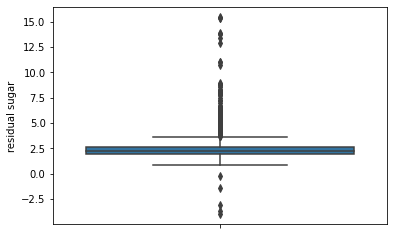

In [25]:
# ahora miramos el percentaje de azucar
sns.boxplot(y='residual sugar', data=wine)

In [17]:
# Generando una serie como filtro a una columna
negative_sugar = wine['residual sugar'] < 0
# .drop(serie.index)
wine = wine.drop(wine[negative_sugar].index)

<AxesSubplot:ylabel='residual sugar'>

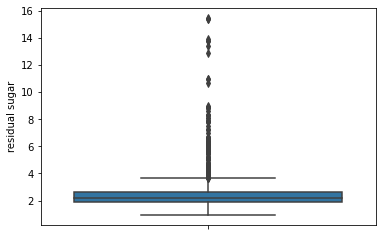

In [27]:
# ahora miramos el percentaje de azucar otra vez, despues de haber eliminados estos valores
sns.boxplot(y='residual sugar', data=wine)

In [30]:
# ahora vamos a ver si hay valores faltantes
wine.isnull().sum()

fixed acidity           5
volatile acidity        0
citric acid             0
residual sugar          5
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 5
success                 0
country                 0
pricing                 0
dtype: int64

In [18]:
# ya que son pocos, podemos quitar estas lineas
# Editando el dataframe, pasando series sin nulos en algunas columnas
wine = wine[wine['residual sugar'].notna()]
wine = wine[wine['alcohol'].notna()]
wine = wine[wine['fixed acidity'].notna()]

In [19]:
# Suma de valores nulos, para comprobar que se hallan eliminado, deberan dar 0
print(wine['residual sugar'].isnull().sum())
print(wine['alcohol'].isnull().sum())
print(wine['fixed acidity'].isnull().sum())

0
0
0


c:\xampp\htdocs\big data\big data aplicada a los negocios\big_data\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol'>

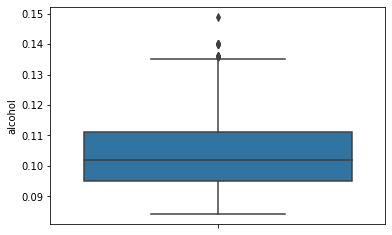

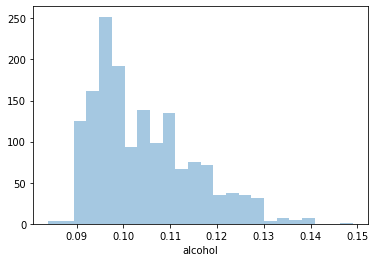

In [33]:
# por fin, miramos histograma y boxplot de alcohol
sns.boxplot(y='alcohol', data=wine)
plt.figure()
# kde = False // Grafico de probabilidades
sns.distplot(wine['alcohol'], kde=False)

# Analisis multivariadas

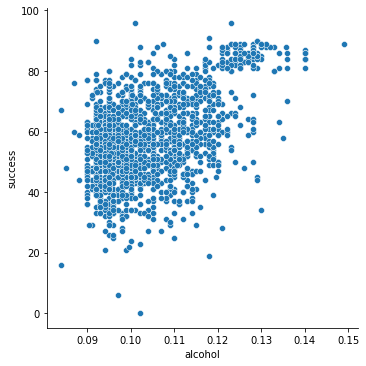

In [34]:
# Primero empezamos con el scatter plot
sns.relplot(x="alcohol", y="success", data=wine)

<AxesSubplot:xlabel='alcohol', ylabel='success'>

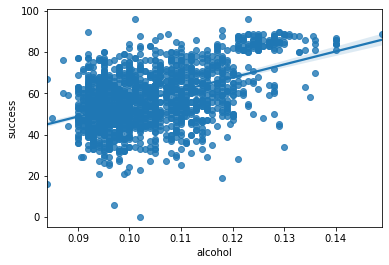

In [35]:
# regplot => permite generar una linea de tendencia
# ahora scatter plot mas linea, para identificar mejor las tendencias
sns.regplot(x='alcohol', y="success", data=wine)

AxesSubplot(0.125,0.125;0.775x0.755)


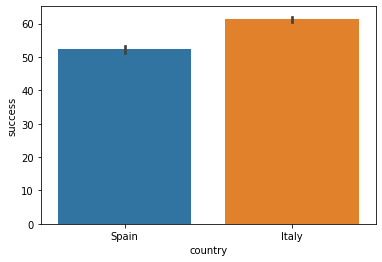

In [43]:

# ahora vamos con correlacion entre variable categorica y variable numerica!
print(sns.barplot(x='country', y='success', data=wine))

<AxesSubplot:xlabel='country', ylabel='success'>

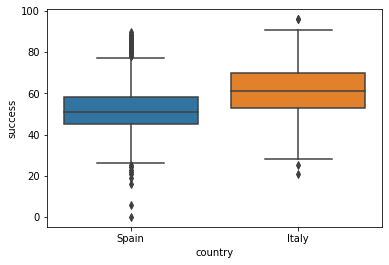

In [41]:
# Boxplot, caja de bigotes, especificando los ejes de las x y de las y
sns.boxplot(x='country', y='success', data=wine)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.258031     0.674978   
volatile acidity          -0.258031          1.000000    -0.552140   
citric acid                0.674978         -0.552140     1.000000   
residual sugar             0.111588          0.004103     0.141654   
chlorides                  0.099885          0.069851     0.193606   
free sulfur dioxide       -0.152438         -0.012801    -0.055551   
total sulfur dioxide      -0.112323          0.074377     0.039590   
density                    0.669249          0.019901     0.367422   
pH                        -0.684783          0.233807    -0.543375   
sulphates                  0.184291         -0.261690     0.310069   
alcohol                   -0.066361         -0.200294     0.108587   
success                    0.031751         -0.236940     0.150994   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<AxesSubplot:>

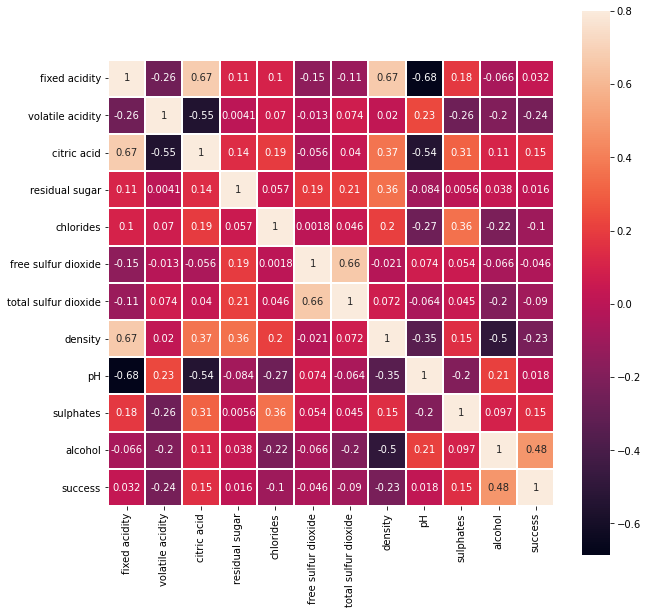

In [46]:
# .corr() // permite ver todas las correlaciones
# 1 => maxima afinidad y 0 sin afinidad
# Colores oscuros, baja correlacion
# Colores claros, alta correlacion
corr = wine.corr()
print(corr)
plt.figure(figsize=(10, 10))
# Genera un grafico de calor, donde presenta la correlacion entre variables
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True)

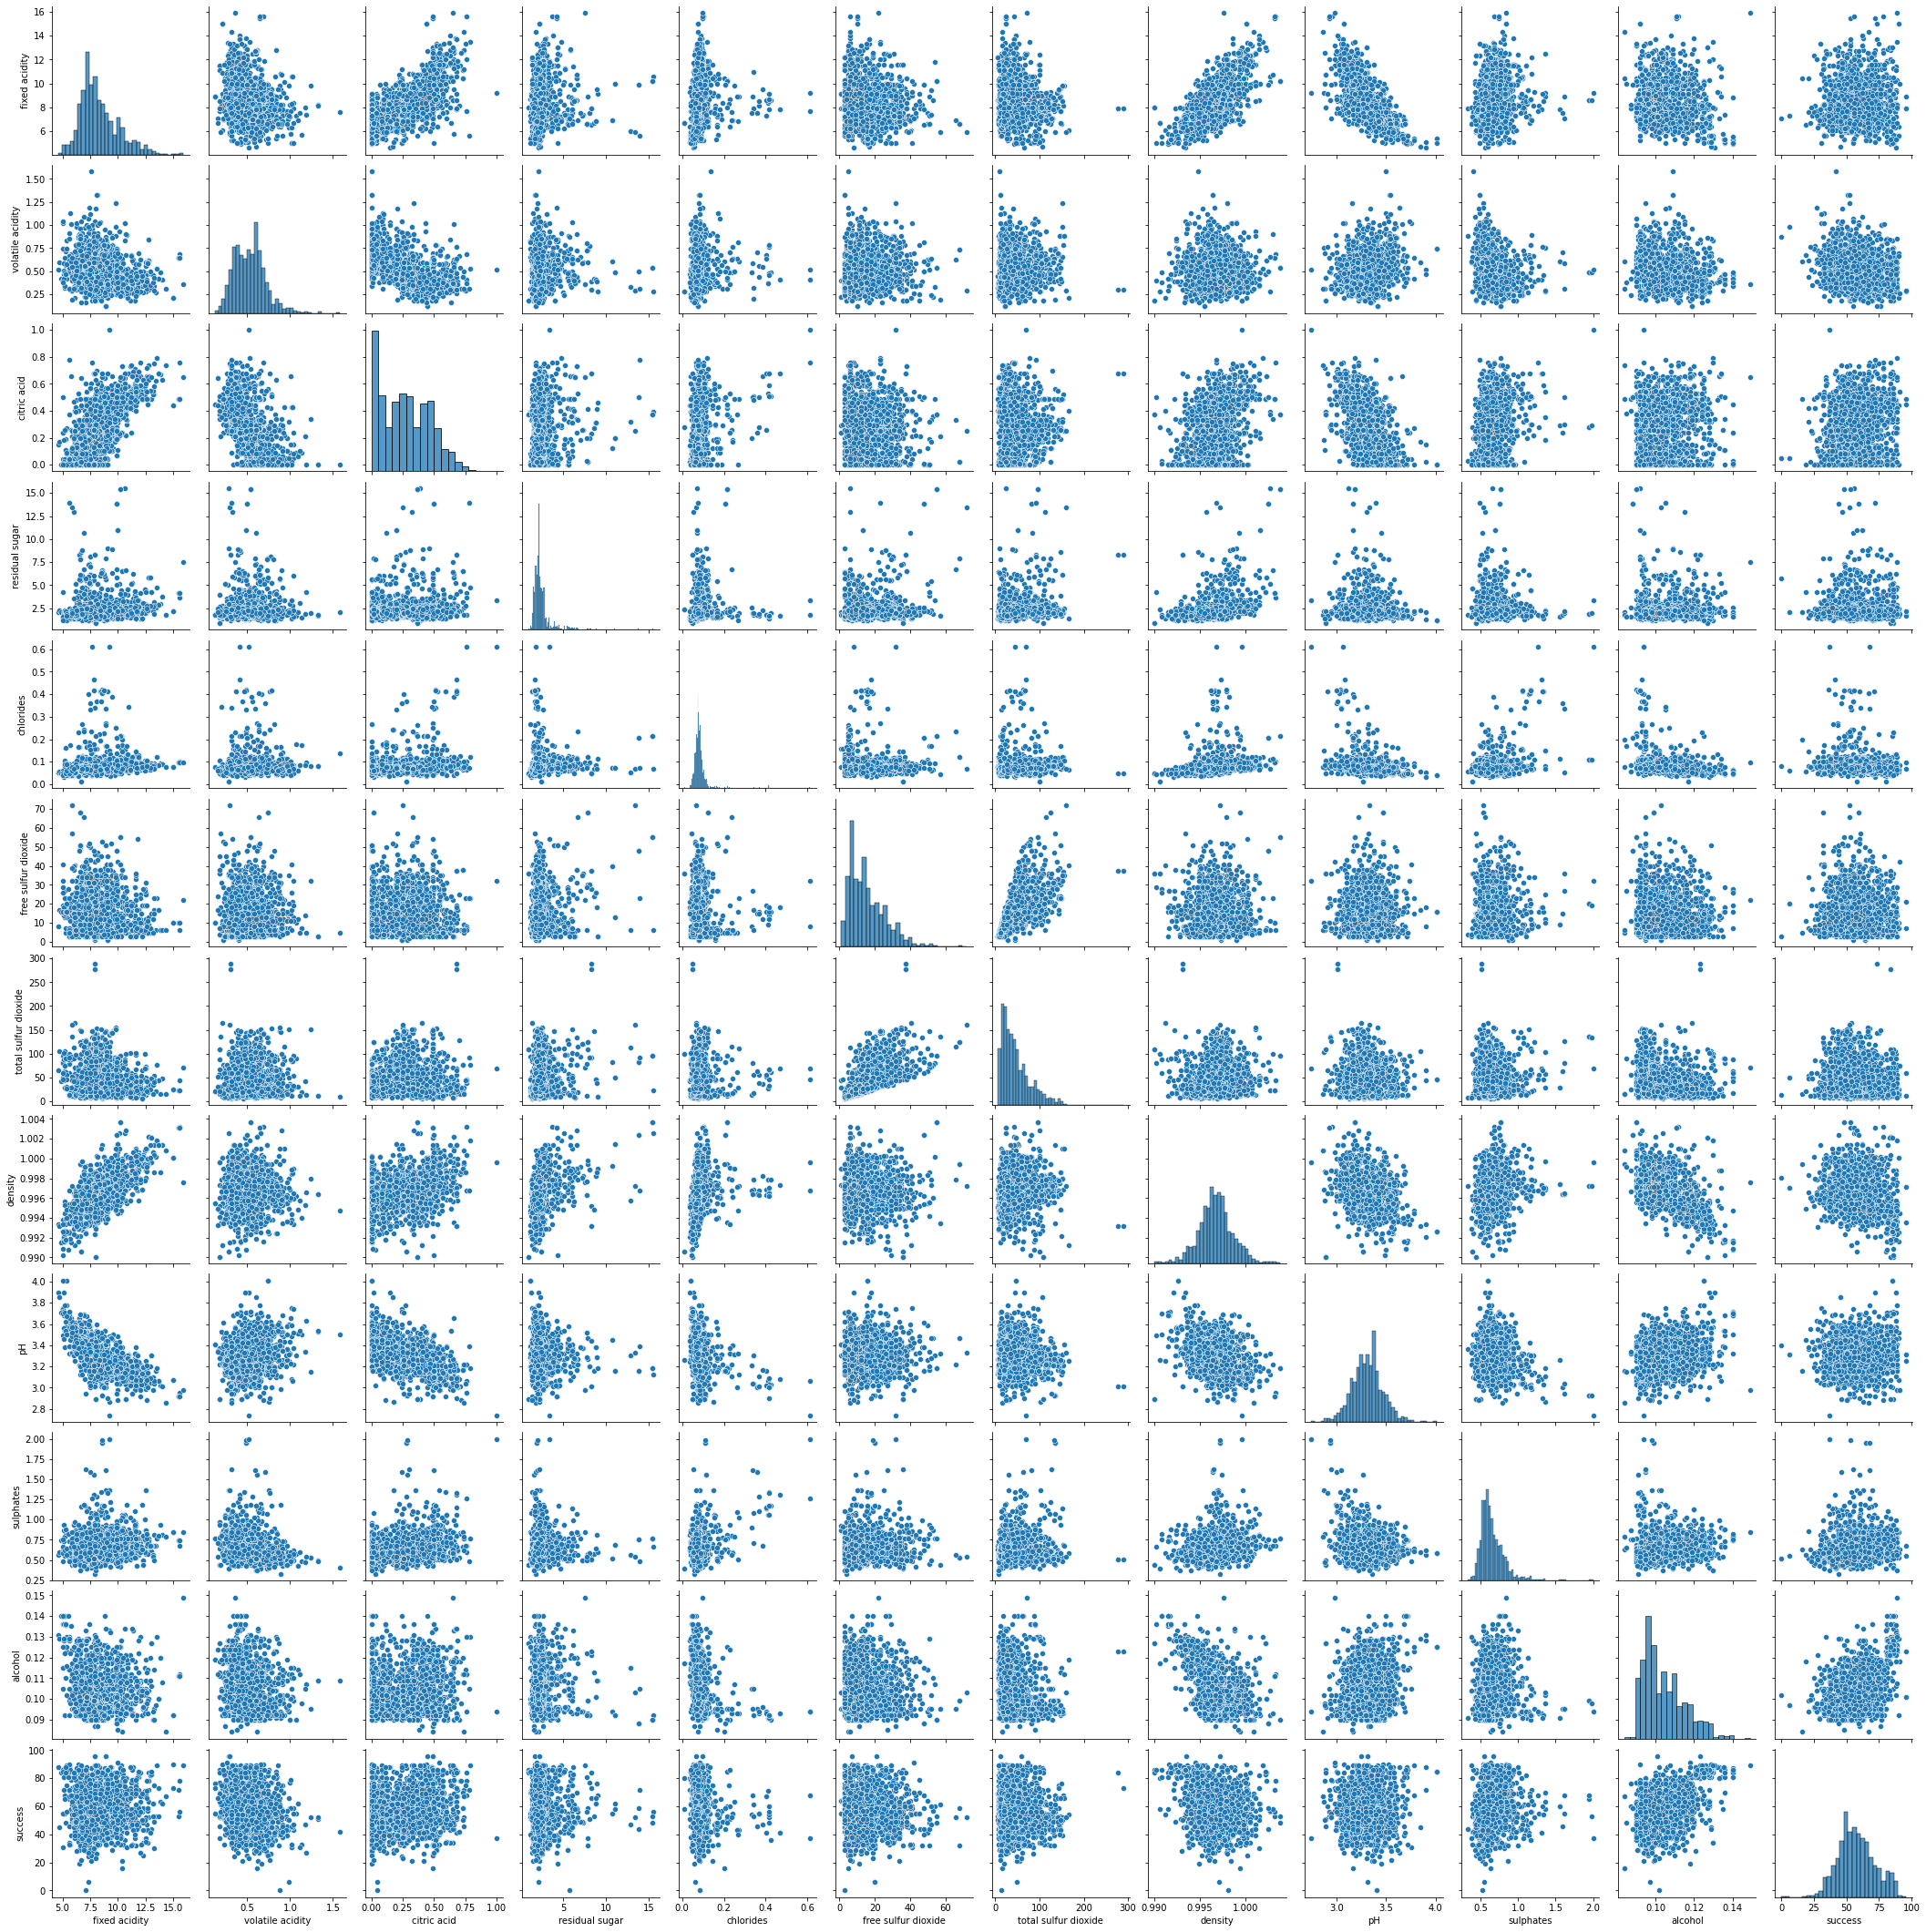

In [40]:
# .pairplot(wine)
# Genera un grafico de todas las posibles vistas de un grafico de puntos staker plot
sns.pairplot(wine)

# Visualizaciones de datos

[]

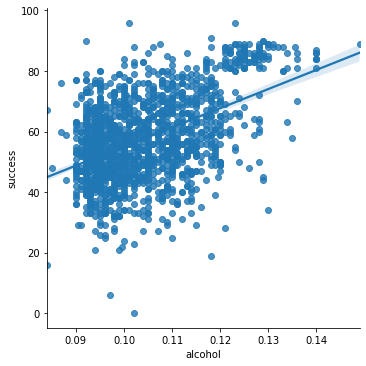

In [50]:
# Grafico de puntos (Skater plot, con linea de tendencia)
sns.lmplot(x='alcohol', y="success", data=wine)

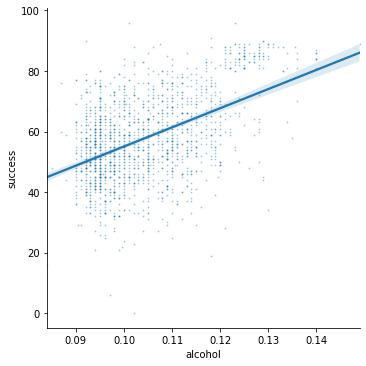

In [52]:
# Grafico de puntos (Sakter plot, con linea de tendencia)
# Seteando el tamaño de los puntos y dando prioridad a la linea de tendencia
# scatter_kws={'s':0.8, 'alpha':0.3}
sns.lmplot(x='alcohol',
           y="success",
           data=wine,
           truncate=True,
           scatter_kws={'s': 0.8, 'alpha': 0.3})

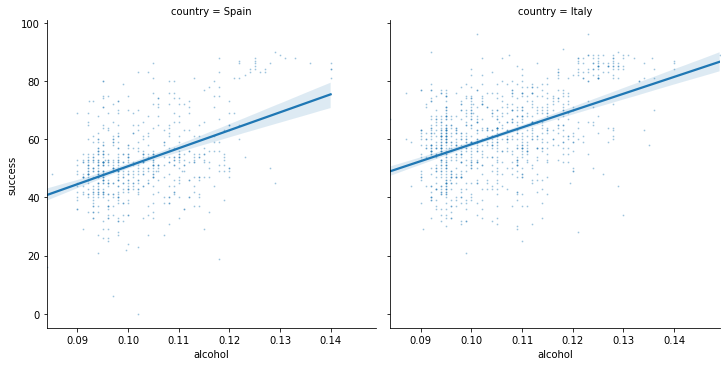

In [53]:
# Grafico de puntos (Sakater plot, con linea de tendencia)
#  col = 'country',
# permite adicionar otra columna comparativa por categoria
sns.lmplot(x='alcohol',
           y="success",
           col='country',
           data=wine,
           truncate=True,
           scatter_kws={'s': 0.8, 'alpha': 0.3})

Text(0.5, 1.0, 'Vinos espanoles')

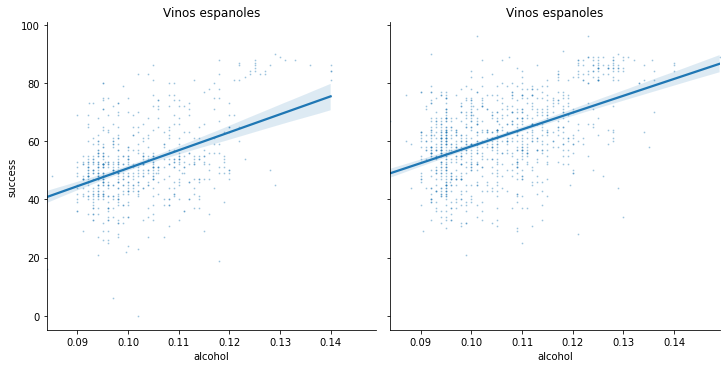

In [54]:
# Modificando los titulos al grafico de Puntos ()
alcohol_success_plot = sns.lmplot(x='alcohol',
                                  y="success",
                                  data=wine,
                                  col='country',
                                  truncate=True,
                                  scatter_kws={'s': 0.8, 'alpha': 0.3})
sns.despine()
axes = alcohol_success_plot.axes.flatten()
axes[0].set_title("Vinos espanoles")
axes[1].set_title("Vinos espanoles")


c:\xampp\htdocs\big data\big data aplicada a los negocios\big_data\venv\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


[Text(0.08, 0, '8.0%'),
 Text(0.09, 0, '9.0%'),
 Text(0.1, 0, '10.0%'),
 Text(0.11, 0, '11.0%'),
 Text(0.12, 0, '12.0%'),
 Text(0.13, 0, '13.0%'),
 Text(0.14, 0, '14.0%'),
 Text(0.15000000000000002, 0, '15.0%')]

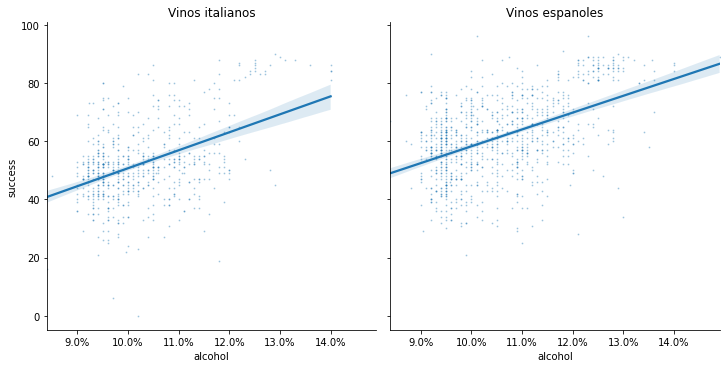

In [56]:
# Grafico de puntos (Skater plot) modificando los axis por porcentajes,
alcohol_success_plot = sns.lmplot(x='alcohol', y="success", data=wine, col='country', truncate=True,
                                  scatter_kws={'s': 0.8, 'alpha': 0.3})
sns.despine()
axes = alcohol_success_plot.axes.flatten()
axes[0].set_title("Vinos italianos")
axes[1].set_title("Vinos espanoles")
vals = axes[1].get_xticks()
axes[1].set_xticklabels(['{:,.1%}'.format(x) for x in vals])

c:\xampp\htdocs\big data\big data aplicada a los negocios\big_data\venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0.5, 1.2, 'Más alcohol, más éxito, en Italia como en España! \n  ¡Podemos predecir el éxito de un vino!')

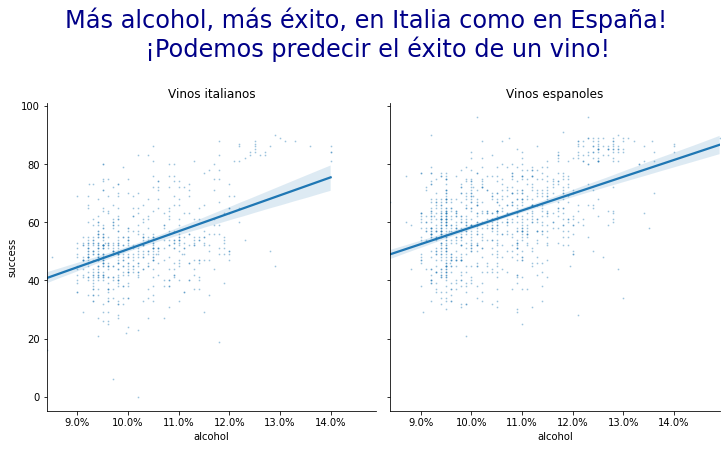

In [55]:
# Grafico de puntos (Skater plot) modificando los axis por porcentajes, y subititulo
alcohol_success_plot = sns.lmplot(x='alcohol', y="success", data=wine, col='country', truncate=True,
                                  scatter_kws={'s': 0.8, 'alpha': 0.3})
sns.despine()
axes = alcohol_success_plot.axes.flatten()
axes[0].set_title("Vinos italianos")
axes[1].set_title("Vinos espanoles")
vals = axes[1].get_xticks()
axes[1].set_xticklabels(['{:,.1%}'.format(x) for x in vals])
plt.suptitle('Más alcohol, más éxito, en Italia como en España! \n  ¡Podemos predecir el éxito de un vino!',
             fontsize=24, ha='center', va='top', color='#000088', y=1.2)

# Nuestro primero model predictivo

In [8]:
# cargamos las funciones necesarias
# LinearRegression // Permitira ralizar la regresion del modelo
from sklearn.linear_model import LinearRegression
# train_test_split // Permitira realizar la division del modelo de datos
from sklearn.model_selection import train_test_split

# Objetivo.
## Predecir el exito en funcion de la tasa de Alcohol

In [20]:
# primero: dividimos los datos entre training y test,
# la variable dependente (y) como las independientes


"""
train_test_split(X, y, rango de ampliacion, random_state=3)
"""
wine = wine.dropna()

X = wine[['alcohol']]
y = wine['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [11]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,country,pricing
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,49.0,Spain,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,0.098,52.0,Italy,Expensive
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,0.098,52.0,Italy,Expensive
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,0.098,72.0,Italy,Budget
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,56.0,Italy,Budget


In [13]:
# vemos que tenemos en el split
X_train

,alcohol
606,0.122
362,0.100
533,0.128
1397,0.099
733,0.095
...,...
789,0.093
256,0.092
968,0.122
952,0.112


In [14]:
X_test

,alcohol
147,0.093
937,0.104
877,0.118
1000,0.115
73,0.092
...,...
841,0.103
889,0.093
1145,0.104
1476,0.088


In [16]:
y_train.to_frame()

,success
606,88.0
362,48.0
533,89.0
1397,38.0
733,41.0
...,...
789,47.0
256,42.0
968,86.0
952,71.0


In [17]:
y_test.to_frame()

,success
147,54.0
937,27.0
877,49.0
1000,62.0
73,49.0
...,...
841,66.0
889,58.0
1145,61.0
1476,59.0


In [21]:
# escogemos como algoritmo una regresion linear
regr = LinearRegression()
# Entrenamos el modelo utilizando el train set
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
# probamos ahora valores distintos
# Cambiando los valores pasados por parametro,
# Podremos comprobar la prediccion de exito para la tasa de alcohol
regr.predict([[0.05]])

array([22.16661384])

# Evaluaciones de modelo predictivo


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
# hacemos las predicciones en el test set
# Carga el set de datos destinado para test
# Devuelve un arreglo con las predicciones para cada valor pasado en X_test
regr.predict(X_test)

array([69.12192473, 68.46976763, 49.55721186, 68.46976763, 50.86152605,
       61.29603958, 60.64388248, 67.16545344, 59.99172539, 56.07878281,
       49.55721186, 60.64388248, 63.90466796, 54.12231153, 50.86152605,
       50.86152605, 64.55682506, 51.51368314, 52.16584024, 51.51368314,
       59.99172539, 50.86152605, 48.90505476, 49.55721186, 51.51368314,
       59.99172539, 54.77446862, 54.12231153, 53.47015443, 52.16584024,
       63.25251087, 53.47015443, 50.20936895, 66.51329634, 53.47015443,
       51.51368314, 58.0352541 , 58.0352541 , 54.77446862, 49.55721186,
       51.51368314, 54.12231153, 61.29603958, 61.29603958, 52.16584024,
       54.12231153, 54.77446862, 58.0352541 , 52.16584024, 61.94819667,
       51.51368314, 54.77446862, 53.47015443, 52.81799734, 73.0348673 ,
       50.20936895, 53.47015443, 51.51368314, 72.3827102 , 58.0352541 ,
       58.0352541 , 57.38309701, 80.86075245, 51.51368314, 51.51368314,
       53.47015443, 46.94858348, 51.51368314, 65.20898215, 50.86

In [32]:
# ahora miramos el error
print("Error absoluto >>", mean_absolute_error(regr.predict(X_test), y_test))
print("Mean Squeared error >>", sqrt(mean_squared_error(regr.predict(X_test), y_test)))

Error absoluto >> 10.657715179506619
Mean Squeared error >> 13.182248688705466


In [34]:
# Nuevo modelo usando las variables alcohol y acidez para predecir el exito
X2 = wine[['alcohol', 'volatile acidity']]
y2 = wine['success']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=3)
regr2 = LinearRegression()
# Entrenamos el modelo utilizando el train set
regr2.fit(X2_train, y2_train)
print("Error absoluto >>", mean_absolute_error(regr2.predict(X2_test), y2_test))
print("Mean Squeared error >>", sqrt(mean_squared_error(regr2.predict(X2_test), y2_test)))

Error absoluto >> 10.457388339193779
Mean Squeared error >> 12.910268703644448


# Encoding de variables

In [37]:
"""
Un modelo de ML, no usa las variables categorias, es necesario trasnformarlas a valores numericos
"""

# Para que registro que cumpla la condicion, devolvera 1 o 0
wine['is_spain'] = np.where(wine['country'] == 'Spain', 1, 0)
# Devolvera 1, 2, 3 equivalentes a la variables categorias
wine['pricing_enc'] = np.where(wine['pricing'] == 'Budget', 1, np.where(wine['pricing'] == 'Medium', 2, 3))
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,success,country,pricing,is_spain,pricing_enc
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,0.105,49.0,Spain,Medium,1,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,0.112,63.0,Italy,Medium,0,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,0.110,67.0,Italy,Budget,0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,0.102,54.0,Italy,Budget,0,1
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,0.110,54.0,Spain,Expensive,1,3


In [46]:
# Evaluamos otra vez la performance de este modelo
# Asigna el DF, eliminando las variables catregoricas o con valores que no aporten al modelo
X3 = wine.drop(['country', 'pricing', 'success'], axis=1)
y3 = wine['success']

# X3.head()
X3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_spain,pricing_enc
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,1,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,0.098,0,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,0.098,0,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,0.098,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0.094,0,1


In [48]:
# Creando el modelo con los datos saneados
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=3)
regr3 = LinearRegression()
# Entrenamos el modelo utilizando el train set
regr3.fit(X3_train, y3_train)

# Se puede apreciar que el error medio y de la media se redujo en las anteriores estimaciones
# Al usar todas las variables en el modelo
print("Error absoluto >>", mean_absolute_error(regr3.predict(X3_test), y3_test))
print("Mean Squeared error >>", sqrt(mean_squared_error(regr3.predict(X3_test), y3_test)))

Error absoluto >> 9.885952686685025
Mean Squeared error >> 12.50516797533017


# Fuerzas aleatorias
# Random Forest and hyperparameter optimization

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
# Ahora pruebamos un modelo de random forest en lugar de uno de linear regression.
# Empezamos con parametros fijos
# Eliminamos las variables categoricas
X4 = wine.drop(['country', 'pricing', 'success'], axis=1)
y4 = wine['success']

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=3)

# Creando el regresor
# n_estimators=5 // Numero de arboles
# max_features=10 // Maximo numero de features por arbol
regr4 = RandomForestRegressor(n_estimators=5, max_features=10)
# Entrenamos el modelo utilizando el train set
regr4.fit(X4_train, y4_train)
# Al comparar con el modelo por regresion normal, se evidencia el performance es peor
print("Error absoluto >>", mean_absolute_error(regr4.predict(X4_test), y4_test))
print("Mean Squeared error >>", sqrt(mean_squared_error(regr4.predict(X4_test), y4_test)))

Error absoluto >> 9.864556962025317
Mean Squeared error >> 12.572531969598735


In [54]:
# probamos ahora distintos parametros por las forestas aleatorias
param_grid = [
    {'n_estimators': [10, 25, 100, 150, 200], 'max_features': [5, 10]}]

# Entrenando el algoritmo pasando los nuevos parametros
grid_search_forest = GridSearchCV(regr4, param_grid, cv=10, scoring='neg_mean_absolute_error')
grid_search_forest.fit(X4_train, y4_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_features=10, n_estimators=5),
             param_grid=[{'max_features': [5, 10],
                          'n_estimators': [10, 25, 100, 150, 200]}],
             scoring='neg_mean_absolute_error')

In [56]:
#seleccionamos la mejor estimacion proporcionada para el modelo
best_forest = grid_search_forest.best_estimator_
best_forest

RandomForestRegressor(max_features=10, n_estimators=150)

In [57]:
# miramos ahora el resultado
# Pasamos los datos de entretamiento en los ejes
best_forest.fit(X4_train, y4_train)
# Probamos usando los nuevoos parametros calculados con la libreria
# Mejoro bastante la optimizacion del error
print("Error absoluto >>", mean_absolute_error(best_forest.predict(X4_test), y4_test))
print("Mean Squeared error >>", sqrt(mean_squared_error(best_forest.predict(X4_test), y4_test)))

Error absoluto >> 9.631626280892105
Mean Squeared error >> 12.479222992095014
